# PCM Modeling

In this section of the tutorial, we will use the knowledge from all previous tutorials to construct a simple PCM classification model for a small list of adenosine receptors.

## Data Preparation

Most of the data preparation steps are already provided in  [data_preparation_advanced](./data_preparation_advanced.ipynb) so we will again use an already prepared dataset from the `datasets.py` module:

In [1]:
from datasets import AR_PCM

ds = AR_PCM()
print(ds.proteincol)
print(ds.proteinseqprovider)
print(len(ds))
print(ds.targetProperties)
ds.getDF()

You are downloading the high-quality Papyrus++ dataset.
Should you want to access the entire, though of lower quality, Papyrus dataset,
look into additional switches of this command.
Number of files to be downloaded: 3
Total size: 33.0MB


Reading data from data...
Read all data.
Initialized filters.


0it [00:00, ?it/s]

Number of compounds:12457
Wrote data to file 'data/AR_LIGANDS.tsv'.
You are downloading the high-quality Papyrus++ dataset.
Should you want to access the entire, though of lower quality, Papyrus dataset,
look into additional switches of this command.
Number of files to be downloaded: 3
Total size: 33.0MB


accession
<function AR_PCM.<locals>.sequence_provider at 0x7fd958b5b130>
12457
[TargetProperty(name=pchembl_value_Median_class, task=SINGLECLASS, th=[6.5])]


,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,QSPRID,pchembl_value_Median_class
QSPRID,,,,,,,,,,,,,,,,,,,,,
AR_LIGANDS_0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,=,8.68,8.68,0.0,0.0,1.0,8.68,0.0,AR_LIGANDS_0,True
AR_LIGANDS_1,AACWUFIIMOHGSO_on_P30542_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P30542_WT,...,=,6.68,6.68,0.0,0.0,1.0,6.68,0.0,AR_LIGANDS_1,True
AR_LIGANDS_2,AAEYTMMNWWKSKZ_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131451,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,AAEYTMMNWWKSKZ,AAEYTMMNWWKSKZ-UHFFFAOYSA-N,InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...,"""AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...",P29274_WT,...,=,4.82,4.82,0.0,0.0,1.0,4.82,0.0,AR_LIGANDS_2,False
AR_LIGANDS_3,AAGFKZWKWAMJNP_on_P0DMS8_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P0DMS8_WT,...,=,7.15,7.15,0.0,0.0,1.0,7.15,0.0,AR_LIGANDS_3,True
AR_LIGANDS_4,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,=,5.65,5.65,0.0,0.0,1.0,5.65,0.0,AR_LIGANDS_4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AR_LIGANDS_12452,ZZMIPZLRKFEGIA_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.202018,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,ZZMIPZLRKFEGIA,ZZMIPZLRKFEGIA-UHFFFAOYSA-N,InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...,"""AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...",P29274_WT,...,=,6.51,6.51,0.0,0.0,1.0,6.51,0.0,AR_LIGANDS_12452,True
AR_LIGANDS_12453,ZZXIVHBZTITUIW_on_P0DMS8_WT,High,ChEMBL31,ChEMBL31.compound.248509,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,ZZXIVHBZTITUIW,ZZXIVHBZTITUIW-UHFFFAOYSA-N,InChI=1S/C16H19N5O3/c1-4-23-15(22)11-9-18-16(1...,"""AuxInfo=1/1/N:1,13,14,2,20,19,21,11,7,12,6,18...",P0DMS8_WT,...,=,7.61,7.61,0.0,0.0,1.0,7.61,0.0,AR_LIGANDS_12453,True
AR_LIGANDS_12454,ZZXIVHBZTITUIW_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.248509,CCOC(=O)c1cnc(NCC(C)C)n2nc(-c3ccco3)nc12,ZZXIVHBZTITUIW,ZZXIVHBZTITUIW-UHFFFAOYSA-N,InChI=1S/C16H19N5O3/c1-4-23-15(22)11-9-18-16(1...,"""AuxInfo=1/1/N:1,13,14,2,20,19,21,11,7,12,6,18...",P29274_WT,...,=,7.35,7.35,0.0,0.0,1.0,7.35,0.0,AR_LIGANDS_12454,True


The only difference between PCM and regular models is the need for protein descriptors. Adding them is as simple as adding a `ProteinDescriptorCalculator` to the list of calculators in the call to `prepareDataset`:

In [2]:
from qsprpred.data.utils.datasplitters import randomsplit
from qsprpred.data.utils.descriptorcalculator import ProteinDescriptorCalculator, MoleculeDescriptorsCalculator
from qsprpred.data.utils.descriptorsets import ProDecDescriptorSet, FingerprintSet
from qsprpred.data.utils.descriptor_utils.msa_calculator import ClustalMSA
from sklearn.preprocessing import StandardScaler as Scaler

calc_prot = ProteinDescriptorCalculator(
    descsets=[ProDecDescriptorSet(sets=["Zscale Hellberg"])],
    msa_provider=ClustalMSA(out_dir=ds.storeDir)
)
calc_mol = MoleculeDescriptorsCalculator(descsets = [FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)])

ds.prepareDataset(
    split=randomsplit(0.2), # note that this is only for illustration and using a random split like this is usually not a good idea in PCM
    feature_calculators=[calc_prot, calc_mol],
    feature_standardizer=Scaler()
)

  0%|          | 0/4 [00:00<?, ?it/s]

Missing values filled with nan


In [3]:
ds.getFeatures()[0] # training set feature matrix

,Descriptor_PCM_ProDec_Zscale_1,Descriptor_PCM_ProDec_Zscale_2,Descriptor_PCM_ProDec_Zscale_3,Descriptor_PCM_ProDec_Zscale_4,Descriptor_PCM_ProDec_Zscale_5,Descriptor_PCM_ProDec_Zscale_6,Descriptor_PCM_ProDec_Zscale_7,Descriptor_PCM_ProDec_Zscale_8,Descriptor_PCM_ProDec_Zscale_9,Descriptor_PCM_ProDec_Zscale_10,...,Descriptor_FingerprintSet_MorganFP_2038,Descriptor_FingerprintSet_MorganFP_2039,Descriptor_FingerprintSet_MorganFP_2040,Descriptor_FingerprintSet_MorganFP_2041,Descriptor_FingerprintSet_MorganFP_2042,Descriptor_FingerprintSet_MorganFP_2043,Descriptor_FingerprintSet_MorganFP_2044,Descriptor_FingerprintSet_MorganFP_2045,Descriptor_FingerprintSet_MorganFP_2046,Descriptor_FingerprintSet_MorganFP_2047
QSPRID,,,,,,,,,,,,,,,,,,,,,
AR_LIGANDS_242,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_9719,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-1.241310,...,1.609254,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_9767,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_8175,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-1.241310,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,5.386563,-0.17313,-0.186225,-0.205295
AR_LIGANDS_6498,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AR_LIGANDS_6878,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,1.609254,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_5797,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-1.241310,...,1.609254,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_8077,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295


In [4]:
ds.getFeatures()[1] # test set feature matrix

,Descriptor_PCM_ProDec_Zscale_1,Descriptor_PCM_ProDec_Zscale_2,Descriptor_PCM_ProDec_Zscale_3,Descriptor_PCM_ProDec_Zscale_4,Descriptor_PCM_ProDec_Zscale_5,Descriptor_PCM_ProDec_Zscale_6,Descriptor_PCM_ProDec_Zscale_7,Descriptor_PCM_ProDec_Zscale_8,Descriptor_PCM_ProDec_Zscale_9,Descriptor_PCM_ProDec_Zscale_10,...,Descriptor_FingerprintSet_MorganFP_2038,Descriptor_FingerprintSet_MorganFP_2039,Descriptor_FingerprintSet_MorganFP_2040,Descriptor_FingerprintSet_MorganFP_2041,Descriptor_FingerprintSet_MorganFP_2042,Descriptor_FingerprintSet_MorganFP_2043,Descriptor_FingerprintSet_MorganFP_2044,Descriptor_FingerprintSet_MorganFP_2045,Descriptor_FingerprintSet_MorganFP_2046,Descriptor_FingerprintSet_MorganFP_2047
QSPRID,,,,,,,,,,,,,,,,,,,,,
AR_LIGANDS_836,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-1.241310,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_4601,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_7311,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,1.609254,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_10969,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,1.609254,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_9453,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-1.241310,...,1.609254,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,5.369854,-0.205295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AR_LIGANDS_4554,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-1.241310,...,1.609254,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,5.369854,-0.205295
AR_LIGANDS_8249,-1.682623,-1.682623,-1.682623,-1.682623,1.682623,1.682623,1.682623,1.682623,1.682623,1.463400,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295
AR_LIGANDS_10932,0.594310,0.594310,0.594310,0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.594310,-0.061848,...,-0.621406,-0.093848,-0.10565,-0.128552,-0.124041,-0.129356,-0.185647,-0.17313,-0.186225,-0.205295


In [5]:
ds.save() # save for later

## Model Construction

Now that we have defined our preprocessing steps, we can construct our model. We will use a simple random forest model in this case, but notice that the training code is completely the same as in the simple [training tutorial](./tutorial_training.ipynb):

In [6]:
from sklearn.ensemble import RandomForestClassifier
from qsprpred.models.models import QSPRsklearn

model = QSPRsklearn(base_dir = '.', data=ds, alg = RandomForestClassifier, name='PCM_RF')

params = {
    'n_estimators' : [50, 100],
    "n_jobs": [1]
}
model.bayesOptimization(search_space_bs=params, n_trials=2)
_ = model.evaluate()
model.fit()

[I 2023-04-20 15:18:01,537] A new study created in memory with name: no-name-7d518f0f-5d50-4dfe-a308-74830a2eb3aa


Bayesian optimization can take a while for some hyperparameter combinations
{}


[I 2023-04-20 15:18:37,784] Trial 0 finished with value: 0.8956949528519049 and parameters: {}. Best is trial 0 with value: 0.8956949528519049.


{}


[I 2023-04-20 15:19:12,825] Trial 1 finished with value: 0.895854196338264 and parameters: {}. Best is trial 1 with value: 0.895854196338264.
/home/sichom/projects/QSPRpred/qsprpred/models/models.py:78: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(**fit_set)


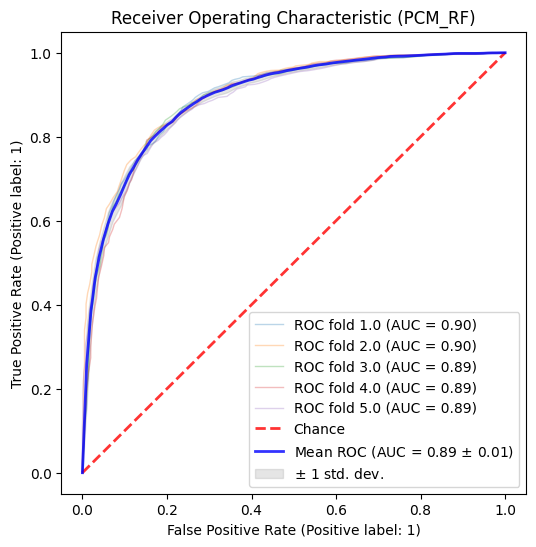

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [7]:
from qsprpred.plotting.classification import ROCPlot

plot = ROCPlot([model])
plot.make("pchembl_value_Median_class", 'cv', save = True, show=True)

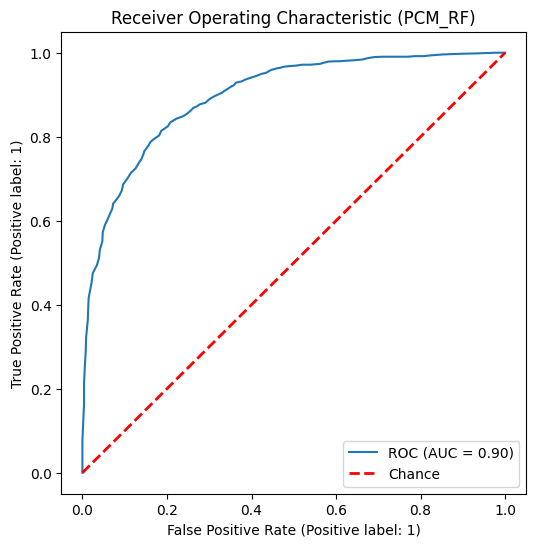

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [8]:
plot.make("pchembl_value_Median_class", 'ind', save = True, show=True)

## Model Prediction

Prediction with the PCM model works similarly to regular models. We can load the saved model using its name (`RF_PCM`) as usual:

In [9]:
model_from_files = QSPRsklearn(name='PCM_RF', base_dir = '.')
model_from_files

But then when doing the prediction, we need to provide the protein ID to fetch protein descriptors for as well. You can see that regular call to `predict` now does not work

In [10]:
sample_mols = [
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', # caffeine
    'c1ccccc1CCN1N=CC2=C1N=C(N)N3C2=NC(C4=CC=CO4)=N3' # SCH-58261 (50x more selective to A2A than caffeine -> more potent)
]

In [11]:
try:
    model_from_files.predictMols(
        sample_mols
    )
except ValueError as e:
    print(e)

This is a PCM model, please provide a protein id to predict the molecules on.


We need to use one of the protein IDs from the training data to fetch the appropriate protein descriptors:

In [12]:
ds.getSubset(ds.proteincol)[ds.proteincol].unique()

array(['P29274', 'P30542', 'P0DMS8', 'P29275'], dtype=object)

In [13]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P29274', # human adenosine A2A receptor
    use_probas=True
)

  0%|          | 0/4 [00:00<?, ?it/s]

Missing values filled with nan
/home/sichom/software/miniconda/envs/QSPRpred/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.79, 0.21],
       [0.  , 1.  ]])

Now that makes sense. We can see that for the selective compound (`SCH-58261`), the model predicts it as active with confidence. If we use the same compounds with the other isoforms, we can see that indeed the result would be inactive for this compound hinting at its selectivity:

In [14]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P30542', # human adenosine A2A receptor
    use_probas=True
)

  0%|          | 0/4 [00:00<?, ?it/s]

Missing values filled with nan
/home/sichom/software/miniconda/envs/QSPRpred/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.77, 0.23],
       [0.96, 0.04]])

In [15]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P0DMS8', # human adenosine A2A receptor
    use_probas=True
)

  0%|          | 0/4 [00:00<?, ?it/s]

Missing values filled with nan
/home/sichom/software/miniconda/envs/QSPRpred/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.64, 0.36],
       [0.98, 0.02]])

In [16]:
model_from_files.predictMols(
    sample_mols,
    protein_id = 'P29275', # human adenosine A2A receptor
    use_probas=True
)

  0%|          | 0/4 [00:00<?, ?it/s]

Missing values filled with nan
/home/sichom/software/miniconda/envs/QSPRpred/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.82, 0.18],
       [0.75, 0.25]])